<a href="https://colab.research.google.com/github/aksl007/ai_source/blob/main/01_02_boston_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEEKLY QUIZ WEEK2 위클리퀴즈 2주차입니다.

좌측 상단에 파일->Drive에 사본 저장->구글 드라이브에 있는 사본으로 문제 푸신 후 실행 제출 부탁드립니다.

제출 시 상단의 노트 제목은 "week2_이름"으로 변경하시고 우측 상단에 공유 눌러서 링크 복사 후에 링크 올리시면 됩니다.
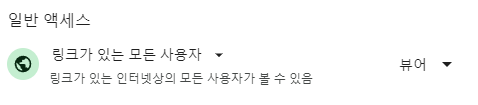

금일 11시 59분까지 제출해주세요.

# 1. 보스턴 시의 타운별 집값 데이터를 불러오고, 요약 정보를 출력하세요.

* 첨부한 boston2 파일을 사용하세요.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

boston = pd.read_csv('/content/boston2.txt')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


##변수 설명
* crim: 범죄율
* indus: 비소매 상업지역 면적 비율
* chas: 찰스강 경계 여부 (1이면 경계, 0이면 비경계)
* nox: 일산화질소 농도
* rm: 주택당 방의 개수의 평균
* age: 1940년 이전에 건설된 소유주택 비율
* dis: 5개 주요 고용센터까지의 가중 거리
* rad: 고속도로 접근성 지수
* tax: 재산세율
* ptratio: 학생/교사 비율
* black: 흑인 비율
* lstat: 낮은 지위의 인구 비율
* medv: 주택 가격의 중앙값 (집값)
* zn2: 25000 평방비트 이상 주거지역 비율

# 2. sns.pairplot을 통해 집값과 다른 변수 간의 관계를 시각화하세요.
 * 변수가 14개로 많기 때문에 시간이 꽤 걸립니다.
* 집값(medv)과의 관계가 목적이기에 x_vars나 y_vars 변수를 이용해 차트 수를 줄일 수 있습니다.
* [링크](https://seaborn.pydata.org/generated/seaborn.pairplot.html)에서 {x, y}_vars 변수의 설명을 확인 할 수 있습니다.

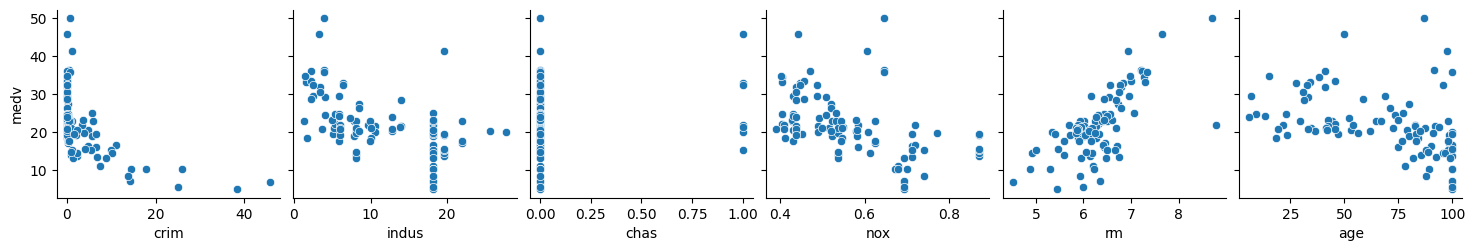

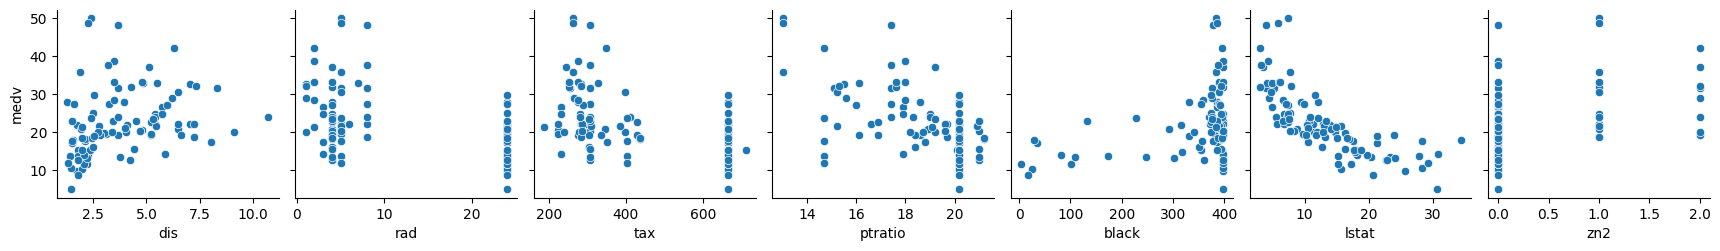

In [ ]:
sns.pairplot(boston.sample(100),
             x_vars=['crim', 'indus', 'chas', 'nox', 'rm', 'age'],
             y_vars=['medv']
             )
sns.pairplot(boston.sample(100),
             x_vars=['dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'zn2'],
             y_vars=['medv']
             )
plt.show()

#3. 집값과 상관성 있는 변수를 두 개 선택해 시각화하세요.

 * 선택한 두 변수를 출력합니다.
* 정답은 없습니다. 2번의 차트를 보고 결정하세요.
 * 각 변수와 집값 사이의 산포도 두 개를 plt.subplot을 이용해 출력합니다.

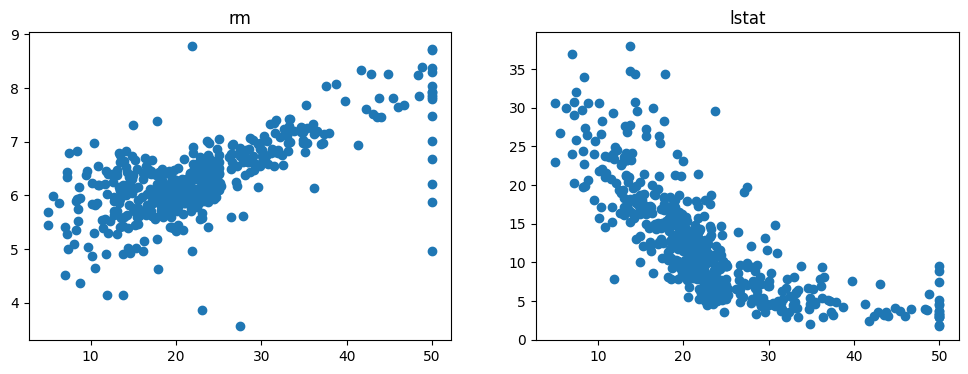

In [ ]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax1.scatter(boston['medv'],boston['rm'])
ax1.set_title('rm')

ax2 = fig.add_subplot(122)
ax2.scatter(boston['medv'],boston['lstat'])
ax2.set_title('lstat')

plt.show()

# 4. 3번의 두 변수를 범주화한 변수 두 개를 추가하고, 피벗 테이블로 정리하세요.

 * 변수를 구간별로 나눠 범주화합니다. (변수가 범주형이면 생략 가능합니다.)
* 예시) 범죄율(crim)이 0\~33 사이면 0, 33\~67 사이면 1, 67\~100 사이면 2를 가지는 변수(crim_level)를 추가합니다.
* [pd.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html), [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) 함수를 이용해 범주화할 수 있습니다.
 * 새 변수 두 개를 행과 열 인덱스로 설정하고, 집값의 평균을 계산한 피벗 테이블을 생성합니다.

In [ ]:
boston['rm_label'] = pd.cut(boston['rm'], bins=5)
boston['lstat_label'] = pd.cut(boston['lstat'], bins=5)

temp1 = boston.groupby(['rm_label','lstat_label'], as_index = False)['medv'].mean()
temp1



<ipython-input-12-d97f6e90b107>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp1 = boston.groupby(['rm_label','lstat_label'], as_index = False)['medv'].mean()


,rm_label,lstat_label,medv
0,"(3.556, 4.605]","(1.694, 8.978]",27.500000
1,"(3.556, 4.605]","(8.978, 16.226]",23.100000
2,"(3.556, 4.605]","(16.226, 23.474]",11.900000
3,"(3.556, 4.605]","(23.474, 30.722]",8.800000
4,"(3.556, 4.605]","(30.722, 37.97]",10.400000
5,"(4.605, 5.649]","(1.694, 8.978]",50.000000
6,"(4.605, 5.649]","(8.978, 16.226]",19.993750
7,"(4.605, 5.649]","(16.226, 23.474]",14.706667
8,"(4.605, 5.649]","(23.474, 30.722]",12.885714
9,"(4.605, 5.649]","(30.722, 37.97]",12.516667


In [ ]:
temp2 = temp1.pivot(index='rm_label', columns='lstat_label', values='medv')
temp2

lstat_label,"(1.694, 8.978]","(8.978, 16.226]","(16.226, 23.474]","(23.474, 30.722]","(30.722, 37.97]"
rm_label,,,,,
"(3.556, 4.605]",27.500000,23.100000,11.900000,8.800000,10.400000
"(4.605, 5.649]",50.000000,19.993750,14.706667,12.885714,12.516667
"(5.649, 6.692]",24.460674,20.620645,15.584058,10.921429,8.400000
"(6.692, 7.736]",33.227143,26.527273,15.133333,7.500000,NaN
"(7.736, 8.78]",45.550000,NaN,NaN,NaN,NaN


참고) 예시처럼 crim_level을 만들기 위해 아래 코드를 이용할 수 있습니다.
```python
df['crim_level'] = pd.cut(df['crim'], bins=[0,33,67,100], labels=[0,1,2])
```
bins는 데이터를 나눌 구간을 지정하는 기준입니다. 정수로 입력할 경우, 데이터를 동일한 길이로 나눌 수 있는 빈을 생성합니다.  
리스트로 입력할 경우, 각 원소는 구간의 경계점이 됩니다.

labels는 각 구간에 부여할 이름을 지정합니다. 설정하지 않으면, 구간의 범위가 범주 이름으로 사용됩니다.

qcut은 bins 대신 분위수 q로 구간을 결정합니다.

#5. 4번의 피벗 테이블을 히트맵으로 시각화하세요.

 * cmap 변수를 이용해 colormap 변경 가능합니다.
* [링크](https://www.practicalpythonfordatascience.com/ap_seaborn_palette)에서 cmap 종류를 확인할 수 있습니다.

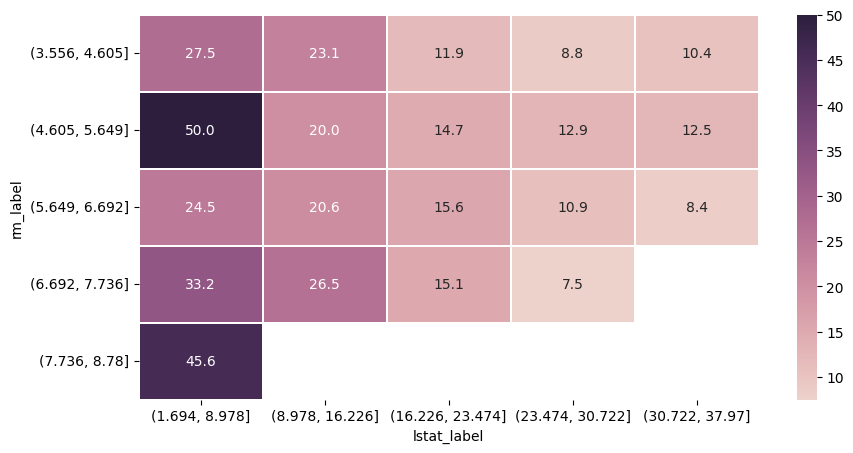

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

#(옵션) 위의 분석을 통해 얻은 인사이트를 적어주세요.

주택당 방의 개수의 평균이 높을수록, 낮은 지위의 인구 비율이 낮을수록 집값이 비쌉니다.

영향도 : lstat > rm


** 주의 : 방 개수가 낮음에도 집값이 비싼 경우가 있다.



rm: 주택당 방의 개수의 평균


lstat: 낮은 지위의 인구 비율


medv: 주택 가격의 중앙값 (집값)